In [1]:
from PIL import Image
from sympy import im
import torch
from pathlib import Path
from typing import List, Sequence
from pdf2image import convert_from_path, convert_from_bytes
from transformers import AutoModelForCausalLM, AutoProcessor, AutoTokenizer
import matplotlib.pyplot as plt

In [2]:
def pdf2image(filepath: Path) -> List[Image.Image]:
    return convert_from_path(filepath)

# filepath = Path('./examples/ES511PRRABEI.pdf')
# filepath = Path('./examples/17.pdf')
filepath = Path('./examples/WPX_net - 1000562758.pdf')
# filepath = Path('./examples/Pawsimo_405035937.pdf')
images = pdf2image(filepath)
print(len(images))

1


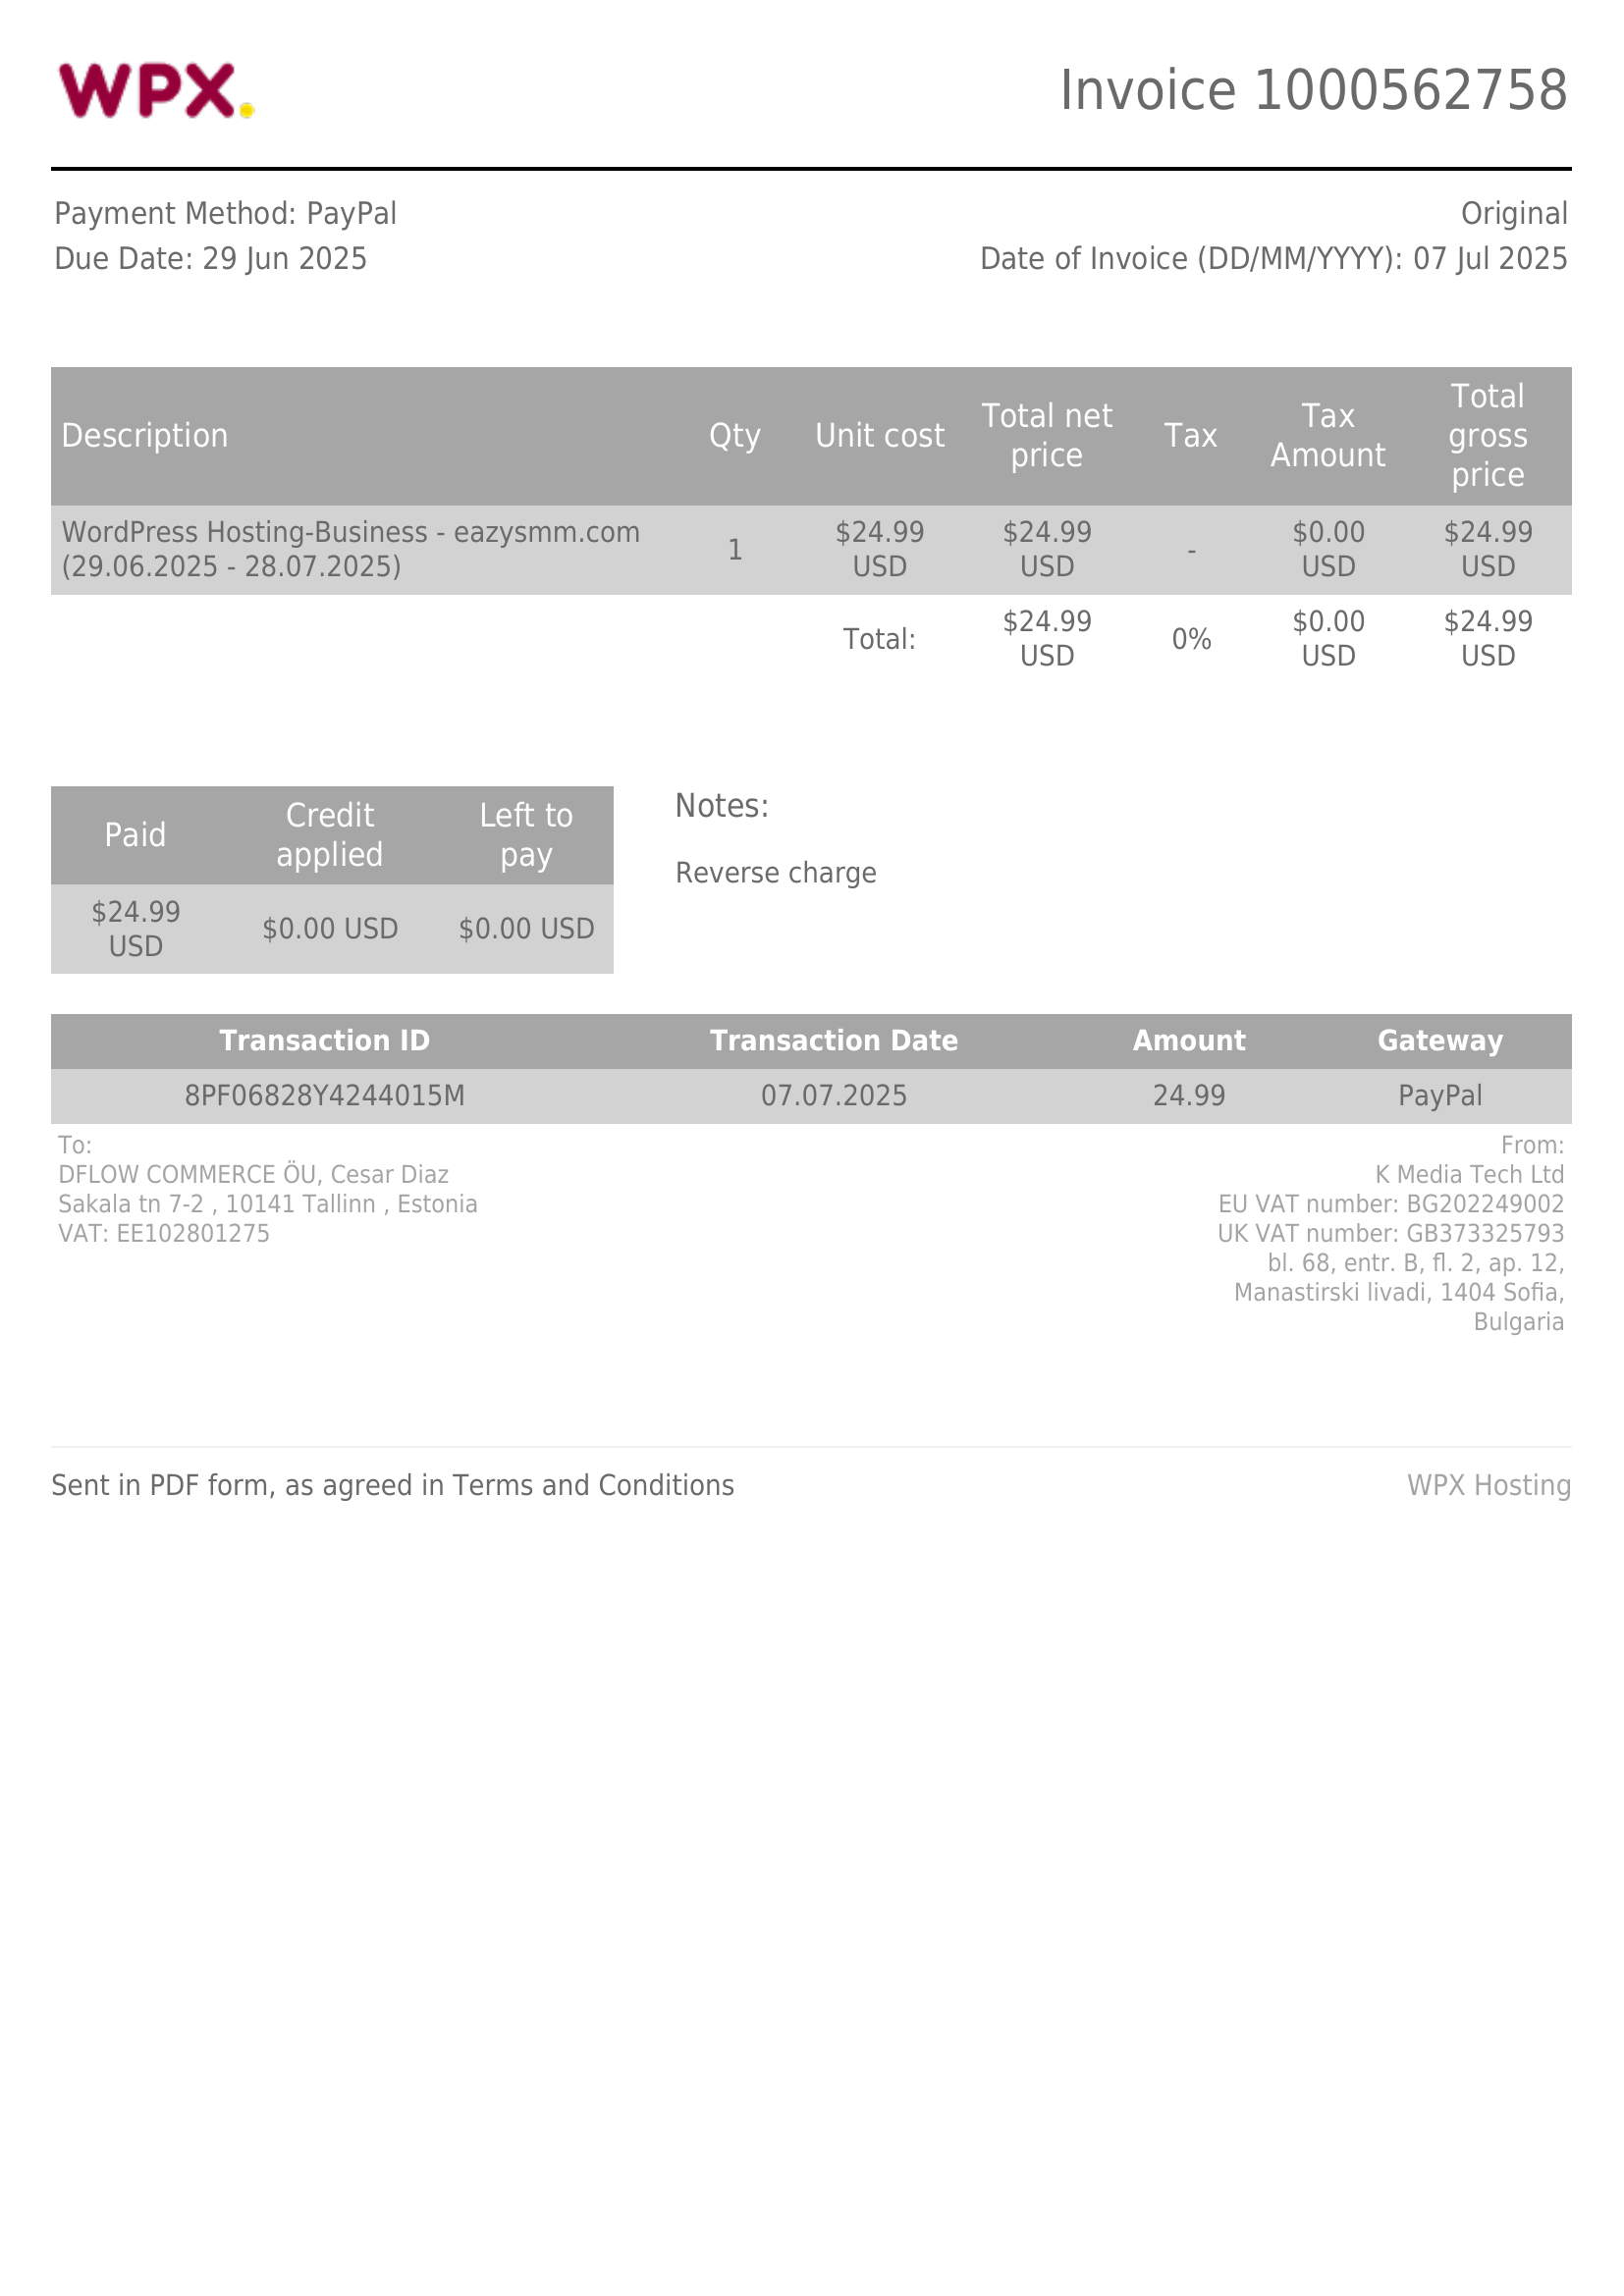

In [77]:
images[0]

### docling: PDF extraction with tables and stuff

In [59]:
from docling.document_converter import DocumentConverter

converter = DocumentConverter()
result = converter.convert(filepath)
print(result.document.export_to_markdown())  # output: "## Docling Technical Report[...]"

2025-12-09 18:20:52,815 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-09 18:20:52,824 - INFO - Going to convert document batch...
2025-12-09 18:20:52,825 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e15bc6f248154cc62f8db15ef18a8ab7
2025-12-09 18:20:52,831 - INFO - Loading plugin 'docling_defaults'
2025-12-09 18:20:52,832 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-12-09 18:20:52,838 - INFO - Loading plugin 'docling_defaults'
2025-12-09 18:20:52,840 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-12-09 18:20:52,840 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-12-09 18:20:52,841 - INFO - easyocr cannot be used because it is not installed.
2025-12-09 18:20:52,976 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-12-09 18:20:52,992 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-12-09 18:20:52,994 [RapidOCR] device_config.py:57: 

<!-- image -->

Payment Method: PayPal

Due Date: 29 Jun 2025

## Invoice 1000562758

Original

Date of Invoice (DD/MM/YYYY): 07 Jul 2025

| Description                                                        | Qty   | Unit cost   | Total net price   | Tax   | Tax Amount   | Total gross price   |
|--------------------------------------------------------------------|-------|-------------|-------------------|-------|--------------|---------------------|
| WordPress Hosting-Business - eazysmm.com (29.06.2025 - 28.07.2025) | 1     | $24.99 USD  | $24.99 USD        | -     | $0.00 USD    | $24.99 USD          |
|                                                                    |       | Total:      | $24.99 USD        | 0%    | $0.00 USD    | $24.99 USD          |

| Paid       | Credit applied   | Left to pay   |
|------------|------------------|---------------|
| $24.99 USD | $0.00 USD        | $0.00 USD     |

Notes:

Reverse charge

| Transaction ID                                     

In [61]:
result = converter.convert(filepath)

outputs_total = result.document.export_to_markdown()

2025-12-09 18:22:19,618 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-09 18:22:19,620 - INFO - Going to convert document batch...
2025-12-09 18:22:19,621 - INFO - Processing document WPX_net - 1000562758.pdf
2025-12-09 18:22:20,380 - INFO - Finished converting document WPX_net - 1000562758.pdf in 0.76 sec.


In [76]:
print(result.document.tables[2].export_to_markdown())

2025-12-09 18:35:37,893 - WARNING - Usage of TableItem.export_to_markdown() without `doc` argument is deprecated.


| Transaction ID                                                                             | Transaction Date   | Amount   | Gateway                                                                                                                                         |
|--------------------------------------------------------------------------------------------|--------------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| 8PF06828Y4244015M                                                                          | 07.07.2025         | 24.99    | PayPal                                                                                                                                          |
| To: DFLOW COMMERCE ÖU, Cesar Diaz Sakala tn 7-2 , 10141 Tallinn , Estonia VAT: EE102801275 |                    | EU UK    | From: K Media Tech Ltd VAT number: BG202249002 VAT num

In [24]:
from doctr.models import ocr_predictor, detection_predictor, recognition_predictor
from doctr.io import DocumentFile
import numpy as np

DEVICE = "cuda:3"

det_model = detection_predictor('fast_base', pretrained=True, assume_straight_pages=True).to(DEVICE)
rec_model = recognition_predictor('sar_resnet31', pretrained=True).to(DEVICE)

pdf_doc = DocumentFile.from_pdf(filepath)
# model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
# result = model(pdf_doc)
# outputs_total = result.render()

/home/alex/miniconda3/envs/dinov3/lib/python3.10/site-packages/doctr/models/utils/pytorch.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archiv

In [6]:
det_result = det_model(pdf_doc)

In [3]:
# bbox = det_result[0]['words'][0]

def plot_bbox(bbox):
    x1, y1, x2, y2 = bbox
    plt.vlines(x1, y1, y2)
    plt.vlines(x2, y1, y2)
    plt.hlines(y1, x1, x2)
    plt.hlines(y2, x1, x2)

TypeError: plot_bbox() takes 1 positional argument but 3 were given

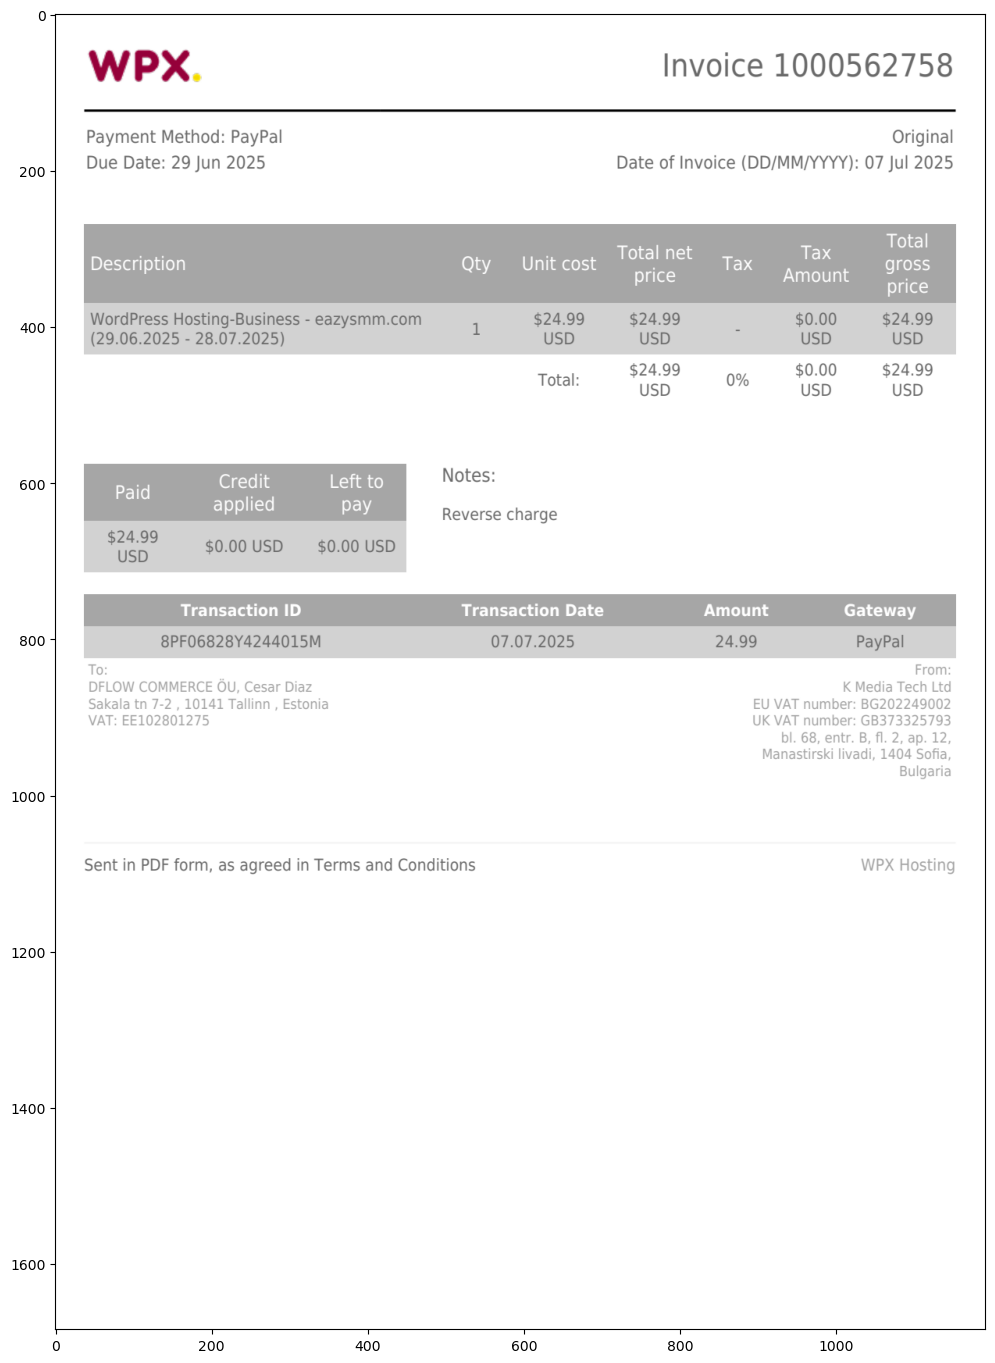

In [8]:
import random

plt.figure(figsize=(12, 20))
plt.imshow(pdf_doc[0])

for _ in range(20):
    idx = random.randint(0, det_result[0]['words'].shape[0])
    bbox = det_result[0]['words'][idx]
    plot_bbox(bbox, *pdf_doc[0].shape[:2])

In [42]:
# Source - https://stackoverflow.com/a
# Posted by Mark Amery, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-04, License - CC BY-SA 4.0

import math
from pdfminer.layout import LAParams, LTTextBox
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator

fp = open(filepath, 'rb')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
pages = PDFPage.get_pages(fp)

bboxes_texts = []
num_pages = 0

outputs_total = ""
for i, page in enumerate(pages):
    num_pages += 1
    # print('Processing next page...')
    interpreter.process_page(page)
    layout = device.get_result()
    for lobj in layout:
        if isinstance(lobj, LTTextBox):
            x, y, text = lobj.bbox[0], lobj.bbox[3], lobj.get_text()
            bboxes_texts.append({'bbox': list(map(round, lobj.bbox)), 
                                 'text': text, 
                                 'page': i})
            print('At %r is text: %s' % ((x, y), text))
            outputs_total += text + '\n'

At (19.85, 774.7905000000001) is text: Payment Method: PayPal
Due Date: 29 Jun 2025
 

At (388.684, 829.1655) is text: Invoice 1000562758

At (359.281, 774.7905000000001) is text: Original
Date of Invoice (DD/MM/YYYY): 07 Jul 2025

At (22.5, 693.9150000000001) is text: Description

At (260.193, 693.9150000000001) is text: Qty

At (298.83, 693.9150000000001) is text: Unit cost

At (22.5, 657.015) is text: WordPress Hosting-Business - eazysmm.com
(29.06.2025 - 28.07.2025)

At (266.748, 650.715) is text: 1

At (22.5, 618.515) is text:  

At (306.224, 657.015) is text: $24.99
USD

At (309.321, 618.015) is text: Total:

At (360.0, 701.115) is text: Total net

At (370.656, 686.715) is text: price

At (367.579, 657.015) is text: $24.99
USD
$24.99
USD

At (427.293, 693.9150000000001) is text: Tax

At (435.379, 650.715) is text: -

At (429.593, 618.015) is text: 0%

At (477.493, 701.115) is text: Tax

At (466.081, 686.715) is text: Amount

At (473.772, 657.015) is text: $0.00
USD
$0.00
USD

At 

In [43]:
_, _, W, H = layout.bbox

In [5]:
DEVICE = "cuda:3"

# CHOSEN_TASK = "ocr"  # Options: 'ocr' | 'table' | 'chart' | 'formula'
# PROMPTS = {
#     "ocr": "OCR:",
#     "table": "Table Recognition:",
#     "formula": "Formula Recognition:",
#     "chart": "Chart Recognition:",
# }

# # OCR
# model_path = "PaddlePaddle/PaddleOCR-VL"
# model = AutoModelForCausalLM.from_pretrained(
#     model_path, 
#     trust_remote_code=True, 
#     torch_dtype=torch.bfloat16,
# ).to(DEVICE).eval()

# processor = AutoProcessor.from_pretrained(model_path, 
#                                           trust_remote_code=True)

# Question answering
model_name = "Qwen/Qwen3-4B-Instruct-2507"

llm = AutoModelForCausalLM.from_pretrained(
    model_name,
    # torch_dtype="auto",
    torch_dtype=torch.bfloat16,
    # device_map="auto"
).to(DEVICE).eval()

tokenizer = AutoTokenizer.from_pretrained(model_name)

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
def resize(image, min_w=648):
    w, h = image.size

    min_size = min(min_w, min(h, w))

    scale = min(h, w) / min_size

    image_resized = image.resize((int(w/scale), int(h/scale)))
    image_resized.size
    return image_resized

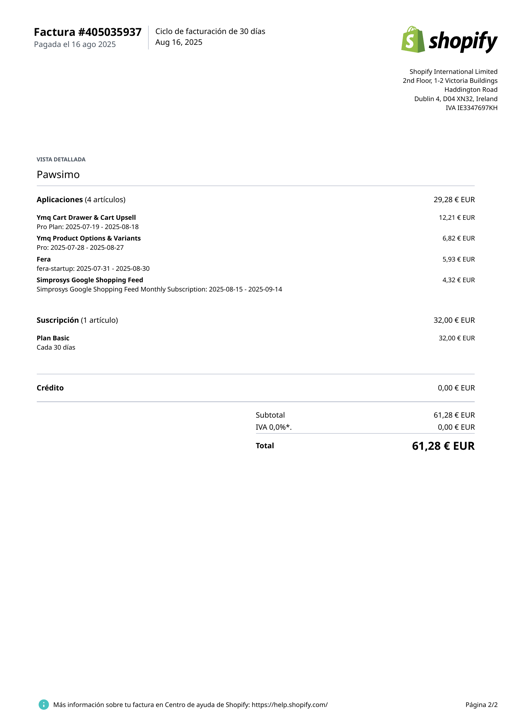

In [28]:
resize(images[1], 512)

In [89]:
CHOSEN_TASK = "ocr"  # Options: 'ocr' | 'table' | 'chart' | 'formula'

outputs_total = ""

for image in images:
    image_resized = resize(image, min_w=648)
    messages = [
        {"role": "user",         
        "content": [
                {"type": "image", "image": image_resized},
                {"type": "text", "text": PROMPTS[CHOSEN_TASK]},
            ]
        }
    ]
    inputs = processor.apply_chat_template(
        messages, 
        tokenize=True, 
        add_generation_prompt=True, 	
        return_dict=True,
        return_tensors="pt"
    ).to(DEVICE)

    outputs = model.generate(**inputs, max_new_tokens=1024)
    outputs = processor.batch_decode(outputs, skip_special_tokens=True)[0]

    outputs_total += "\n" + outputs

In [94]:
print(outputs_total)


User: OCR:
Assistant: NB STUDIOS
RT/RW 003/006, Kepuhrejo, ngantru
[Fulanggang, Indonesia , 66252]
Phone: +62 82140660261
Paypal/Wise: riyandarmawan40@gmail.com
BILL TO
DFLOW COMMERCE OU
17116020
Sakala tn 7-2, 10141
Tallinn, Keskinna linnaosa
DESCRIPTION
Person
Notes
Background
Price
AMOUNT
#1736
5
original
Include
16+1
517
#Special Order 28 - 1
6
original
19
519
#Special Order 28 - 2 + Extra S5
4
original
12+5
517
#Special Order 28 - 3 + Extra S5
5
original
16+5
521
#Special Order 31
3
Minimalist
include
57
57
#Special Order 31
2
original
57
57
Subtotal
$88
-
Taxable
Tax rate
Tax due
-
Other
-
TOTAL
$
88,00
Make all checks payable to NB STUDIOS
If you have any questions about this invoice, please contact [Riyan darmawan, +62 82140660261 , riyandarmawan40@gmail.com] Thank You For Your Business!
INVOICE
DATE
01/09/2025
INVOICE #
17
1
CUSTOMER ID
DUE DATE
01/10/2025


In [ ]:
"""You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.

When determining the buyer, always treat the legal entity listed in the billing, invoice-to, 
or commercial address section as the entity that made the purchase.
If both an individual (person) and a company appear, the company is the legal purchaser, 
and the individual is only the account holder or person placing the order."""

In [62]:
reasoning = ""

system_prompt = """
You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.

When determining the buyer, use the section explicitly labeled as the billing, 
invoice-to, or commercial address.
This may appear under labels such as “Billing Address”, “Invoice To”, “Sold To”, or their language equivalents.

Individual placing the order and the company on behalf of which they're placing the order might be mentioned in different parts of the invoice.
Pay attention to repeating addresses, you need to be able to match them.

If invoice mentions both a company and an individual, the company is the buyer and the individual is only the account holder.

If a VAT number appears next to an entity in the billing/commercial section, that entity is the buyer.
"""

prompt = f"""
    Who is the legal entity that made the purchase, i.e. the buyer? 
    Invoice: {outputs_total}.
    """

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to(llm.device)

generated_ids = llm.generate(
    **model_inputs,
    max_new_tokens=32768,
)

decoded = tokenizer.batch_decode(generated_ids[:, model_inputs.input_ids.shape[1]:], skip_special_tokens=True)[0]
print(decoded)

reasoning += decoded + "\n"

The legal entity that made the purchase, i.e., the **buyer**, is:

**DFLOW COMMERCE ÖU**

This is determined from the "To:" field in the transaction details, which lists the recipient address and VAT number (EE102801275), indicating that DFLOW COMMERCE ÖU is the entity receiving the invoice and thus the buyer.

Note: While "Cesar Diaz Sakala" is listed as a name, the invoice clearly identifies the legal entity as **DFLOW COMMERCE ÖU**, which is a company in Estonia. The individual name appears to be the contact person or account holder, not the legal entity. The presence of a VAT number (EE102801275) further confirms that DFLOW COMMERCE ÖU is the legal buyer.

✅ Final Answer: **DFLOW COMMERCE ÖU**


In [38]:
with open("./temp.txt", "w") as f:
    f.write(outputs_total)

In [63]:
system_prompt = """
You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.

When determining the supplier, always select the entity that appears in the main seller/vendor/supplier section of the invoice.
If multiple related entities appear (such as a parent company and a local branch), choose the entity that is 
associated with the VAT number used on the invoice or the one explicitly labelled as the seller. 
Footer legal text or corporate registration details should only supplement the chosen supplier, not replace it.
"""

prompt = f"""
    Who is the legal entity that provided goods or services, i.e. the supplier. Be concise.
    Invoice: {outputs_total}
    """

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to(llm.device)

generated_ids = llm.generate(
    **model_inputs,
    max_new_tokens=32768,
)

decoded = tokenizer.batch_decode(generated_ids[:, model_inputs.input_ids.shape[1]:], skip_special_tokens=True)[0]
print(decoded)

reasoning += decoded + "\n"

The legal entity that provided goods or services is **K Media Tech Ltd**.


In [64]:
system_prompt = """
You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.
"""

prompt = f"""
    What are the vat rates mentioned in this invoice? It could be one, multiple or none.
    Be concise.
    Invoice: {outputs_total}
    """

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to(llm.device)

generated_ids = llm.generate(
    **model_inputs,
    max_new_tokens=32768,
)

decoded = tokenizer.batch_decode(generated_ids[:, model_inputs.input_ids.shape[1]:], skip_special_tokens=True)[0]
print(decoded)

reasoning += decoded + "\n"

No VAT rates are mentioned in the invoice. The tax rate is listed as "0%" for the service, and the note "Reverse charge" indicates that VAT is not applied by the seller.


In [65]:
print(reasoning)

The legal entity that made the purchase, i.e., the **buyer**, is:

**DFLOW COMMERCE ÖU**

This is determined from the "To:" field in the transaction details, which lists the recipient address and VAT number (EE102801275), indicating that DFLOW COMMERCE ÖU is the entity receiving the invoice and thus the buyer.

Note: While "Cesar Diaz Sakala" is listed as a name, the invoice clearly identifies the legal entity as **DFLOW COMMERCE ÖU**, which is a company in Estonia. The individual name appears to be the contact person or account holder, not the legal entity. The presence of a VAT number (EE102801275) further confirms that DFLOW COMMERCE ÖU is the legal buyer.

✅ Final Answer: **DFLOW COMMERCE ÖU**
The legal entity that provided goods or services is **K Media Tech Ltd**.
No VAT rates are mentioned in the invoice. The tax rate is listed as "0%" for the service, and the note "Reverse charge" indicates that VAT is not applied by the seller.



In [66]:
system_prompt = """
You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.
"""

prompt = f"""
    Summarise this reasoning into one sentence. 
    It must have the final verdict on buyer, supplier, and vat rates.
    Reasoning: {reasoning}
    """

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to(llm.device)

generated_ids = llm.generate(
    **model_inputs,
    max_new_tokens=32768,
)

reasoning_summary = tokenizer.batch_decode(generated_ids[:, model_inputs.input_ids.shape[1]:], skip_special_tokens=True)[0]
print(reasoning_summary)

The buyer is DFLOW COMMERCE ÖU, the supplier is K Media Tech Ltd, and no VAT is applicable (rate is 0% due to reverse charge).


### Using reasoning

In [67]:
system_prompt = """
You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.
Your response must ALWAYS be valid JSON with specific keys. 
If some field is missing, just leave it empty.
Return only JSON. No explanations.
Never invent or infer information not present in the text.

Example format:
{ 
  /// Invoice data
  "invoice_date": "<value>", /// When the invoice was created
  "invoice_number": "<value>", /// A unique ID for tracking each bill 
  "invoice_total_amounts": "<value>", /// including vats
  "invoice_currency": "<value>",
  "description_keyword": "<value>", ///  e.g., software, hosting, legal, medical, rent, etc, (type of service provided, if can be deduced),
  "vat_rates": "<value>", /// (0 %, 9 %, 13 %, 24 %), if VAT rate(s) shown

  /// Supplier data
  "supplier_name": "<value>",
  "supplier_address": "<value>",
  "supplier_country": "<value>",
  "supplier_vat_id": "<value>",
  "supplier_vat_registration": "<value>",
  "supplier_email": "<value>",

  /// Buyer data
  "buyer_name": "<value>",
  "buyer_address": "<value>",
  "buyer_country": "<value>",
  "buyer_vat_id": "<value>",
  "buyer_vat_registration": "<value>",
  "buyer_email": "<value>",
}
"""

# prompt = f"Return the part of the invoice that corresponds to the Supplier's VAT number. Invoice: {outputs}"
# prompt = f"Extract information from this invoice. Invoice: {outputs_total}"
prompt = f"""
  Using the following reasoning previously extracted from invoice: {reasoning_summary}, 
  now fill in specific fields. 
  Full invoice here: {outputs_total}.
  """

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to(llm.device)

generated_ids = llm.generate(
    **model_inputs,
    max_new_tokens=32768,
)

decoded = tokenizer.batch_decode(generated_ids[:, model_inputs.input_ids.shape[1]:], skip_special_tokens=True)[0]
print(decoded)

{
  "invoice_date": "07/07/2025",
  "invoice_number": "1000562758",
  "invoice_total_amounts": 24.99,
  "invoice_currency": "USD",
  "description_keyword": "hosting",
  "vat_rates": "0%",
  "supplier_name": "K Media Tech Ltd",
  "supplier_address": "bl. 68, entr. B, fl. 2, ap. 12, Manastirski livadi, 1404 Sofia, Bulgaria",
  "supplier_country": "Bulgaria",
  "supplier_vat_id": "BG202249002",
  "supplier_vat_registration": "BG202249002",
  "supplier_email": "",
  "buyer_name": "DFLOW COMMERCE ÖU",
  "buyer_address": "Cesar Diaz Sakala tn 7-2 , 10141 Tallinn , Estonia",
  "buyer_country": "Estonia",
  "buyer_vat_id": "EE102801275",
  "buyer_vat_registration": "EE102801275",
  "buyer_email": ""
}


### Without reasoning

In [78]:
system_prompt = """
You're an assistant whose job is to look at text extracted from an invoice and answer questions about that invoice.
Your response must ALWAYS be valid JSON with specific keys. 
If some field is missing, just leave it empty.
Return only JSON. No explanations.
Never invent or infer information not present in the text.

Example format:
{ 
  /// Invoice data
  "general_info_reasoning": "<value>",
  "invoice_date": "<value>", /// When the invoice was created
  "invoice_number": "<value>", /// A unique ID for tracking each bill 
  "invoice_total_amounts": "<value>", /// including vats
  "invoice_currency": "<value>",
  "description_keyword": "<value>", ///  e.g., software, hosting, legal, medical, rent, etc, (type of service provided, if can be deduced),
  "vat_rates": "<value>", /// (0 %, 9 %, 13 %, 24 %), if VAT rate(s) shown,

  /// Supplier data
  "supplier_info_reasoning": "<value>",
  "supplier_name": "<value>",
  "supplier_address": "<value>",
  "supplier_country": "<value>",
  "supplier_vat_id": "<value>",
  "supplier_vat_registration": "<value>",
  "supplier_email": "<value>",

  /// Buyer data
  "buyer_info_reason": "<value>",
  "buyer_name": "<value>",
  "buyer_address": "<value>",
  "buyer_country": "<value>",
  "buyer_vat_id": "<value>",
  "buyer_vat_registration": "<value>",
  "buyer_email": "<value>"
}
"""

# prompt = f"Return the part of the invoice that corresponds to the Supplier's VAT number. Invoice: {outputs}"
# prompt = f"Extract information from this invoice. Invoice: {outputs_total}"
prompt = f"""
  You need to read through an invoice text and fill in seveal fields in a json, following provided instructions.
  In the field '*_reasoning', provide explanations for your choices.
  Full invoice here: {outputs_total}.
  """

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = tokenizer([text], return_tensors="pt").to(llm.device)

generated_ids = llm.generate(
    **model_inputs,
    max_new_tokens=32768,
)

decoded = tokenizer.batch_decode(generated_ids[:, model_inputs.input_ids.shape[1]:], skip_special_tokens=True)[0]
print(decoded)

{
  "general_info_reasoning": "The invoice provides a clear description of the service (WordPress Hosting-Business), quantity, unit cost, and total net and gross prices. The tax rate is explicitly stated as 0%, and there is no VAT applied. The payment method is PayPal, and the due date is 29 Jun 2025. The invoice number is 1000562758. The total amount is $24.99 USD, with no tax amount. The note 'Reverse charge' indicates that VAT is handled differently, likely meaning the buyer is responsible for VAT, which is reflected in the 0% tax rate.",
  "invoice_date": "07 Jul 2025",
  "invoice_number": "1000562758",
  "invoice_total_amounts": 24.99,
  "invoice_currency": "USD",
  "description_keyword": "hosting",
  "vat_rates": "0%",
  
  "supplier_info_reasoning": "The supplier information is provided in the transaction details under 'To:' and includes the company name, address, and VAT ID. The supplier is DFLOW COMMERCE ÖU, located in Tallinn, Estonia, with VAT ID EE102801275.",
  "supplier_n

In [ ]:
import os
os.environ['REPLICATE_API_TOKEN'] = ''

In [96]:
import replicate

input = {
    "prompt": system_prompt + '\n' + prompt
}

for event in replicate.stream(
    "qwen/qwen3-235b-a22b-instruct-2507",
    input=input
):
    print(event, end="")

2025-12-09 18:53:03,339 - INFO - HTTP Request: POST https://api.replicate.com/v1/models/qwen/qwen3-235b-a22b-instruct-2507/predictions "HTTP/1.1 201 Created"
2025-12-09 18:53:03,716 - INFO - HTTP Request: GET https://stream-b.svc.ric1.c.replicate.net/v1/streams/sy67vplrx5mk3izjhjes26jl2q4vcg4xqavecmuaeznwr7qnymoq "HTTP/1.1 200 OK"


{
  "general_info_reasoning": "The invoice date is explicitly mentioned as 'Date of Invoice (DD/MM/YYYY):07 Jul2025'. The invoice number is clearly stated as 'Invoice1000562758'. The total gross amount is $24.99 USD, which matches the 'Total gross price' in the table. The currency is USD as indicated by the amounts. The service described is 'WordPress Hosting-Business', which falls under 'hosting' as a keyword. The VAT rate is0% as shown in the tax column and confirmed by 'Reverse charge' in the notes.",
 "invoice_date": "07/07/2025",
 "invoice_number": "1000562758",
 "invoice_total_amounts": "24.99",
 "invoice_currency": "USD",
 "description_keyword": "hosting",
 "vat_rates": "0%",

 "supplier_info_reasoning": "The supplier is identified from the 'From:' field in the transaction details: 'K Media Tech Ltd' with address in Sofia, Bulgaria. The VAT ID is listed as BG202249002. No email is provided in the text.",
 "supplier_name": "K Media Tech Ltd",
 "supplier_address": "bl.68, entr. B,

In [103]:
import json
result_dict = json.loads(decoded)

In [15]:
for (k, v) in result_dict.items():
    if not v:
        continue
    bbox = [t for t in bboxes_texts if v in t[-1]]
    if len(bbox) > 0:
        result_dict[k] = {'value': v, 'bbox': bbox[0][0]}
    else:
        result_dict[k] = {'value': v, 'bbox': None}

In [120]:
bboxes_texts

[{'bbox': (516.38, 798.73175, 564.659, 818.7815),
  'text': 'Factura\n',
  'page': 0},
 {'bbox': (342.04, 716.5225, 549.9675, 773.4475),
  'text': 'Pagado \nID de referencia del pago 1XCnCIHpU0gKRfDlEZZs\nVendido por Amazon Business EU S.à.r.l, Sucursal en España\nIVA ESW0264006H\n',
  'page': 0},
 {'bbox': (344.29, 661.7725, 477.1900000000001, 699.325),
  'text': 'Fecha de la factura/Fecha de la entrega\nNúmero de la factura\nTotal pendiente\n',
  'page': 0},
 {'bbox': (490.69, 661.7725, 546.0775, 699.325),
  'text': '03 agosto 2025\nES511PRRABEI\n13,97 €\n',
  'page': 0},
 {'bbox': (62.7, 641.619, 134.673, 694.782),
  'text': 'CÉSAR DÍAZ \nSAKALA TN 7-2 \nTALLINN,, 10141 \nEE \n',
  'page': 0},
 {'bbox': (34.35, 604.2425, 291.07750000000004, 614.795),
  'text': 'Si tienes preguntas sobre tus pedidos, visita https://www.amazon.es/contacto\n',
  'page': 0},
 {'bbox': (35.1, 503.6725, 124.19250000000001, 584.4205000000001),
  'text': 'Dirección comercial \nDFLOW COMMERCE ÖU \nSakala tn 

In [133]:
y1, x1, y2, x2

(38.1, 373.9225, 77.2725, 384.475)

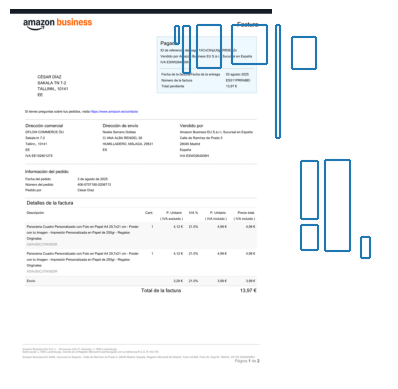

In [132]:
*_, W, H = layout.bbox

plt.imshow(images[0].resize((int(W), int(H))))
plt.axis('off')

for i in range(10):
    if bboxes_texts[i]['page'] != 0:
        continue
    y1, x1, y2, x2 = bboxes_texts[i]['bbox']
    w, h = x2-x1, y2-y1
    plot_bbox((x1, y1, x2, y2))

plt.axis('off');

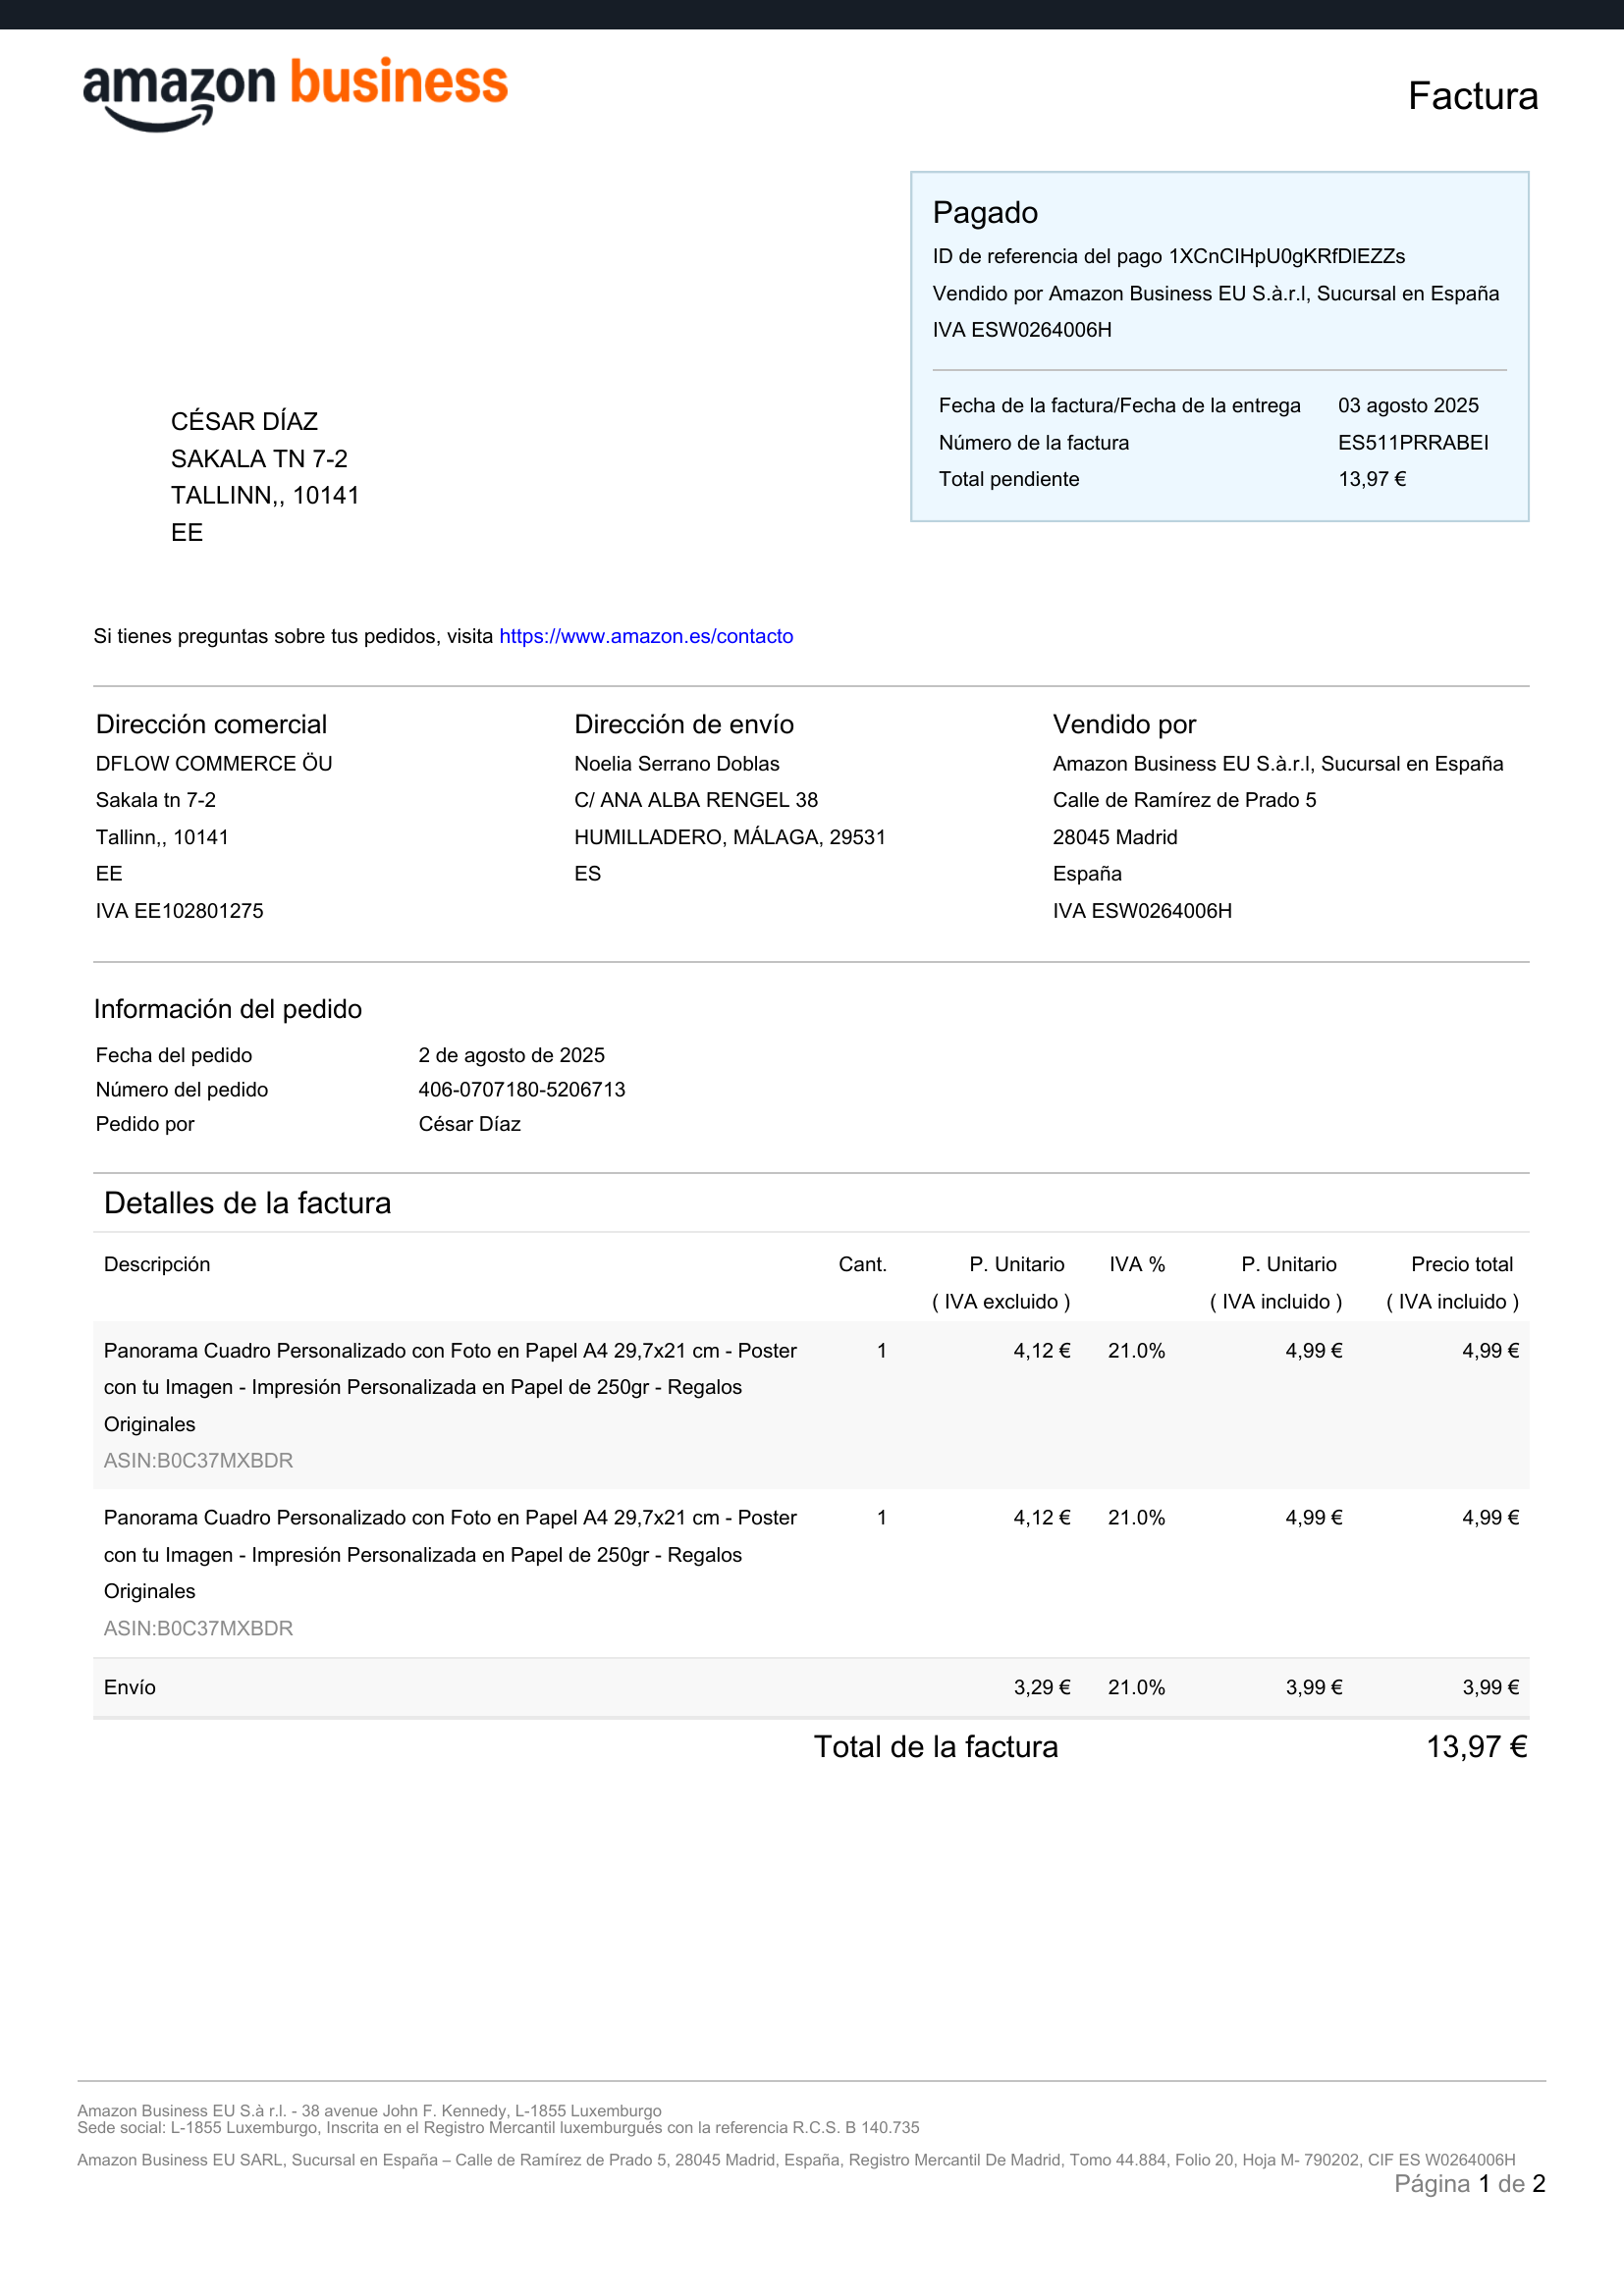

In [53]:
x, y, h, w = bbox[0][0]
print([t[0] for t in bbox])

page.mediabox

[(35.1, 503.6725, 124.19250000000001, 584.4205000000001)]


[0, 0, 595.28, 841.88]

In [149]:
result_dict

{'invoice_date': {'value': '03 agosto 2025',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'invoice_number': {'value': 'ES511PRRABEI',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'invoice_total_amounts': {'value': '13,97 €',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'invoice_currency': {'value': '€',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'description_keyword': {'value': 'printing', 'bbox': None},
 'vat_rates': {'value': '21.0%', 'bbox': (406.39, 342.4225, 427.645, 352.975)},
 'supplier_name': {'value': 'Amazon Business EU S.à.r.l.', 'bbox': None},
 'supplier_address': {'value': 'Calle de Ramírez de Prado 5, 28045 Madrid, España',
  'bbox': (28.35, 46.256, 557.5500000000002, 72.808)},
 'supplier_country': {'value': 'ES',
  'bbox': (342.04, 716.5225, 549.9675, 773.4475)},
 'supplier_vat_id': {'value': 'ESW0264006H',
  'bbox': (342.04, 716.5225, 549.9675, 773.4475)},
 'supplier_vat_registration': {'value': 'R.C.S. B 140.735, Registro Mercantil De Madrid, 

In [52]:
result_dict

{'invoice_date': {'value': '03 agosto 2025',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'invoice_number': {'value': 'ES511PRRABEI',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'invoice_total_amounts': {'value': '13,97 €',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'invoice_currency': {'value': '€',
  'bbox': (490.69, 661.7725, 546.0775, 699.325)},
 'description_keyword': {'value': 'printing', 'bbox': None},
 'vat_rates': {'value': '21.0%', 'bbox': (406.39, 342.4225, 427.645, 352.975)},
 'supplier_name': {'value': 'Amazon Business EU S.à.r.l',
  'bbox': (342.04, 716.5225, 549.9675, 773.4475)},
 'supplier_address': {'value': 'Calle de Ramírez de Prado 5, 28045 Madrid, Spain',
  'bbox': None},
 'supplier_country': {'value': 'Spain', 'bbox': None},
 'supplier_vat_id': {'value': 'ESW0264006H',
  'bbox': (342.04, 716.5225, 549.9675, 773.4475)},
 'supplier_vat_registration': {'value': 'R.C.S. B 140.735, Registro Mercantil De Madrid, Tomo 44.884, Folio 20, Hoja M-790202'

In [1]:
string = eval(decoded)['supplier_vat_id']

[t for t in bboxes_texts if string in t[-1]]

NameError: name 'decoded' is not defined